In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def median(lis):
    lis=np.sort(lis)
    if len(lis)%2==0:
        return lis[((len(lis))/2)-1]
    else: return lis[(len(lis)-1)/2]
def investment_period(y):
    if y in range(2016,2021): return 2020
    elif y in range(2021,2026): return 2025
    else: return 2030
df1=pd.read_csv("Medium scenario/OrganizedTables/HourlyLoadPerNode.csv",index_col=range(4),dtype=np.float64)
df1['total']=df1.sum(axis=1)

In [9]:
df5=pd.DataFrame()
for y in range(2016,2031):
    print y
    for m in range(1,13):
        #peak days timestamp creation
        
        date=df1.loc[(y,m),'total'].idxmax()
        df3=pd.DataFrame()
        if date[1]%2==0:
            for h in range(1,24,2):
                df3.loc[(h-1)/2,'timestamp']="{0}{1}{2}{3}".format(y,str(m).zfill(2),str(int(date[0])).zfill(2),str(h).zfill(2))
        else: 
            for h in range(0,24,2):
                df3.loc[h/2,'timestamp']="{0}{1}{2}{3}".format(y,str(m).zfill(2),str(int(date[0])).zfill(2),str(h).zfill(2))
        df3['timeseries']="{0}{1}P".format(y,str(m).zfill(2))
        #median days timestamp creation
        df4=pd.DataFrame()
        l=[]
        for d in df1.loc[(y,m),'total'].index.levels[1]:
            l.append(df1.loc[(y,m,d),'total'].mean())
        d=l.index(median(l))
        for h in range(12):
            df4.loc[h+12,'timestamp']="{0}{1}{2}{3}".format(y,str(m).zfill(2),str(int(d)).zfill(2),str(h*2).zfill(2))
        df4['timeseries']="{0}{1}M".format(y,str(m).zfill(2))
        df5=df5.append(df3)
        df5=df5.append(df4)
df5=df5.reset_index(drop=True)
df5.index.name="timepoint_id"

2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030


In [ ]:
df5.to_csv("../Main Tabs/timepoints.tab",sep="\t")
df5.to_csv("../Main Tabs/csv/timepoints.csv")

In [10]:
df6=pd.DataFrame(index=df5['timeseries'].unique())
df6.index.name='TIMESERIES'
for index,row in df6.iterrows():
    df6.loc[index,'ts_period']=investment_period(int(index[:4]))
    if index[-1]=='M': 
        #calculating scaling factor according to "timescales.py" the scaling factor represents the number
        #of times that the timeseries is ocurring in a period. See the report for more details.
        df6.loc[index,'ts_scale_to_period']= (df1.xs([int(index[:4]),int(index[4:6]),1],level=[0,1,3]).shape[0]-1)
    else: df6.loc[index,'ts_scale_to_period']= 1
df6['ts_duration_of_tp']=2
df6['ts_num_tps']=12
df6['ts_period']=df6['ts_period'].astype('int64')

In [11]:
#rearreging columns and exporting table
df6=df6[[0,2,3,1]]
df6.to_csv("../Main Tabs/timeseries.tab",sep="\t")
df6.to_csv("../Main Tabs/csv/timeseries.csv")

Year: 2027
Month: 11


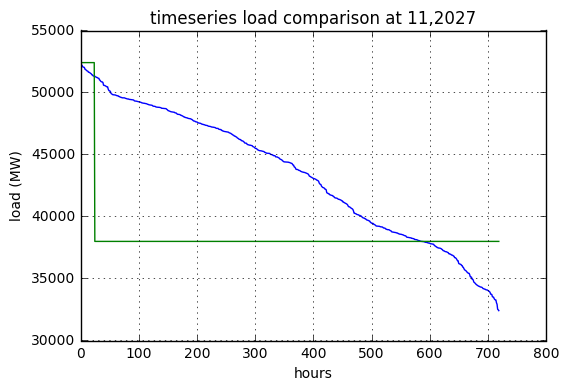

Integral difference between sampling and real values (porcentage): 3.08898005357
The maximum difference porcentage difference between the load duration curve and the sampling was of 11.8435172347 at 10,2030


In [13]:
#graphical analysis of timepoint selection
df2=df1['total']
year=int(raw_input('Year: '))
month=int(raw_input('Month: '))
t=[]
for y in range(2016,2031):
    for m in range(1,13):
        #read the peak and median day from the created timeseries
        peakday=int(str(df5[df5['timeseries'].str[0:7]=="{0}{1}P".format(y,str(m).zfill(2))].iloc[0,0])[6:8])
        medianday=int(str(df5[df5['timeseries'].str[0:7]=="{0}{1}M".format(y,str(m).zfill(2))].iloc[0,0])[6:8])
        l=[]
        l=l+[df2.loc[(y,m,peakday)].max()]*24
        l=l+[df2.loc[(y,m,medianday)].mean()]*(int(df2.xs([y,m]).shape[0])-(24))
        if year==y and month==m:
            plt.plot(df2.loc[(y,m)].sort_values(ascending=False).tolist())
            plt.plot(l)
            plt.xlabel("hours")
            plt.ylabel("load (MW)")
            plt.title('timeseries load comparison at {0},{1}'.format(m,y))
            plt.grid()
            plt.show()
            print "Integral difference between sampling and real values (porcentage): {0}".format(diff)
        diff=abs(((df2.loc[(y,m)].sum()-sum(l))/df2.loc[(y,m)].sum())*100)
        t.append(diff)
        maxi=max(t)
print "The maximum difference porcentage difference between the load duration curve and the sampling was of {0} at {1},{2}".format(maxi,t.index(maxi)%12,t.index(maxi)/12 + 2016)